In [1]:
import os
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = loadmat("./ex8data1.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

Text(0, 0.5, 'Throughput (mb/s)')

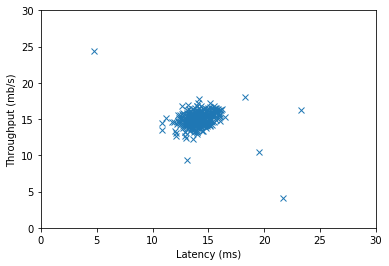

In [3]:
plt.plot(  data['X'][:,0], data['X'][:,1], 'x')
plt.axis([0,30,0,30])
plt.xlabel( 'Latency (ms)' )
plt.ylabel( 'Throughput (mb/s)' )

In [4]:
def estimateGaussian(X):
    m, n = X.shape
    mu = (1/m)*np.sum(X, axis= 0)
    sigma2 = (1/m)*np.sum((X-mu)**2, axis= 0)
    return mu, sigma2

In [5]:
def gaussian( X, mu, sigma2 ):
    k = len(mu)
    if sigma2.ndim == 1 :
        sigma2 = np.diag(sigma2)
    X = X - mu
    return (2 * np.pi)**(-k/2) * np.linalg.det(sigma2)**(-0.5) * \
        np.exp( -0.5 * np.sum(np.multiply(X.dot(np.linalg.inv(sigma2) ), X ), axis=1)).reshape(( X.shape[0], 1 ))

In [6]:
prob = gaussian(X, mu, sigma2)
print(prob.shape)

NameError: name 'X' is not defined

In [ ]:
def visualize_fit( X, mu, sigma2 ):
    x = y = np.arange( 0, 30, 0.5 )
    xx, yy = np.meshgrid( x, y )
    z = gaussian( np.vstack( (xx.ravel(), yy.ravel()) ).T, mu, sigma2 )
    z = z.reshape( xx.shape )
    levels = [ 10**a for a in range(-20, 0, 3) ]
    plt.contour( xx, yy, z, levels=levels )

In [ ]:
plt.plot(  data['X'][:,0], data['X'][:,1], 'x')
plt.axis([0,30,0,30])
plt.xlabel( 'Latency (ms)' )
plt.ylabel( 'Throughput (mb/s)')
visualize_fit(X, mu , np.diag( sigma2))

In [ ]:
def selectThreshold(yval, pval):
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0
   
    for epsilon in np.linspace(1.01*min(pval), max(pval), 1000):
        predictions = (pval < epsilon)
        tp = np.sum((predictions == yval) & (yval == 1))
        fp = np.sum((predictions == 1) & (yval == 0))
        fn = np.sum((predictions == 0) & (yval == 1))
        
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        
        F1 = 2 * prec * rec / (prec + rec)
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon

    return bestEpsilon, bestF1

In [ ]:
pval = gaussian( data['Xval'], mu, sigma2 )
epsilon, f1 = selectThreshold( data['yval'], pval)

In [ ]:
outliers = gaussian(X, mu, sigma2 )[:,0] < epsilon

In [ ]:
plt.plot(  data['X'][:,0], data['X'][:,1], 'x')
plt.axis([0,30,0,30])
plt.xlabel( 'Latency (ms)' )
plt.ylabel( 'Throughput (mb/s)')
visualize_fit(X, mu , np.diag( sigma2) )
plt.scatter(X[outliers][:,0], X[outliers][:,1], s=60, edgecolors='r', facecolors='None', linewidth=1.5 )